<a href="https://colab.research.google.com/github/medmac01/tsf-tasks/blob/main/Task0/ML_Task0_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Getting the dataset

In [ ]:
!wget "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

--2022-07-04 17:33:26--  https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 212 [text/plain]
Saving to: ‘student_scores - student_scores.csv’

student_scores - st 100%[===================>]     212  --.-KB/s    in 0s      

2022-07-04 17:33:26 (7.42 MB/s) - ‘student_scores - student_scores.csv’ saved [212/212]



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("student_scores - student_scores.csv")

#Print the dataset
print(df)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


Training and test data

In [ ]:
from sklearn.model_selection import train_test_split

X = df['Hours']
y = df['Scores']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

#define our model
lr = LinearRegression(normalize=True)

In [ ]:
# X_train.reshape(-1,1)
lr.fit(X_train.values.reshape(-1,1),y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

Model accuracy : 0.9367661043365056




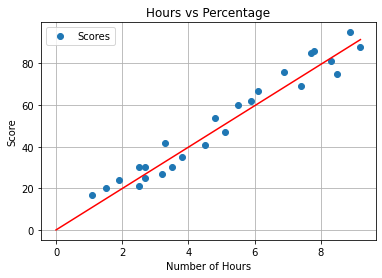

In [ ]:
print("Model accuracy : " + str(lr.score(X_test.values.reshape(-1,1),y_test)))
print('\n')
x = np.linspace(0,np.max(df['Hours']),100)
fx = lr.coef_*x

df.plot(x='Hours',y='Scores',style='o')
plt.title("Hours vs Percentage")
plt.xlabel("Number of Hours")
plt.ylabel("Score")
plt.plot(x,fx,"-r")
plt.grid()
plt.show()

In [ ]:
pred_input = np.array([9.25])

print("Number of hours: {}".format(str(pred_input[0])))
print("Predicted Score: {}".format(lr.predict(pred_input.reshape(-1,1))[0]))

Number of hours: 9.25
Predicted Score: 93.89272889341652


Model Evaluation

In [ ]:
from sklearn import metrics

y_pred = lr.predict(X_test.values.reshape(-1,1))
print("MAE: {}".format(metrics.mean_absolute_error(y_test,y_pred)))

MAE: 4.130879918502482
